### Additional exercises on PCA, ICA and FA

### Question 1. Principal Component Analysis


#### Question 1.1. Projections and errors 

For the data given below. Compute the projection of the data onto the plane as well as the error of the projection (use the projection onto the orthogonal complement)

In [ ]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

data = sio.loadmat('dataSupplementPCA.mat')

data_z = 3*data[:,0] + 2*data[:,1] + 1
data_z = data_z + np.random.normal(0, 0.1, np.shape(data_z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data_z, marker=m)
plt.show()



#### Question 1.2. PCA for Magnetic resonance imaging

Load the file 'ds114_sub009_t2r1' from the [following link](https://github.com/matthew-brett/consden/blob/master/ds114_sub009_t2r1.nii). This file contains a sequence of volumetric images. display a couple of slices from the volumes. What do the volume represent ?

In [ ]:
import nibabel as nib
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_data()
data.shape

The data contains a (time) sequence of 3D images. There are 173 time samples. In this exercise, we will see the 3D pixel elements (voxels) as our samples. Each voxel is thus represented by a sequence of 173 time values encoding how this voxel evolves through time.

#### Question 1.2.1 Centering

Start by centering the voxel by subtracting their means

#### Question 1.2.2 Principal component Analysis

Compute the principal components of the centered data and display their corresponding time evolution

#### Question 1.2.3 Interpreting the components

Compute the projection of the volume (i.e. the collection of voxels) onto the components 1 to 4 and display the resulting images (central slice). Recall that the projection of a voxel onto a particular component will have a large value if the evolution of that voxel through time is best captured by that component.

#### Question 1.2.4 Extended use
In your opinion, what could those components be used for ?

### Question 2. Independent Component Analysis 

#### Question 2.1. Independent Component Analysis from scratch

We consider a model of the form 

$$\mathbf{x} = \mathbf{M}\mathbf{s}$$

where $\mathbf{s}$ are independent sources (such as the recordings we used in the coktail party exercise). We want to recover the unmixing matrix $\mathbf{U} = \mathbf{M}^{-1}$ such that the sources can then be obtained via $\tilde{\mathbf{s}} = \mathbf{M}\mathbf{x}$. 

How do we recover $\mathbf{U}$ then ?

For a random variable $s$ withe density $p_s(s)$, the density of $\mathbf{x} = \mathbf{M}\mathbf{s}$ can be obtained as ($|\mathbf{U}|$ here denotes the absolute value of the determinant of the matrix $\mathbf{U}$).  

$$p_x(x) = p_s(\mathbf{U}\mathbf{x})|\mathbf{U}| (*)$$

in order to recover the $\mathbf{s}$ from the mixing $\mathbf{M}\mathbf{s}$, we will proceed as usual and write down the joint density. Since we assumed that the sources are independent (we further assume that they are equally distributed), we can write  

$$p(s) = \prod_{i=1}^{|S|} p_s(s_i)$$


now using the relation $(*)$, we can use this density to get the density for $\mathbf{x}_i$, 

$$p(x) = \prod_{i=1}^{|S|} p_s(\mathbf{u}^T_i\mathbf{x})|\mathbf{U}|$$

where $\mathbf{u}_i$ is the $i^{th}$ row of the unmixing matrix $\mathbf{U}$. As for other learning problems, we can (1) assume that all the prototypes are independent, and hence write the total density as 

$$p(\left\{\mathbf{x}^{(i)}\right\}) = \prod_{j=1}^{N}\prod_{i=1}^{|S|} p_s(\mathbf{u}^T_i\mathbf{x}^{(j)})|\mathbf{U}|$$

the log of the probability density which gives 

$$\ell(\mathbf{U}) = \sum_{i=1}^{|S|} \sum_{j=1}^N \log p_s(\mathbf{u}_i^T\mathbf{x}^{(j)}) + \log(|\mathbf{U}|)$$


In order to recover the $\mathbf{U}$, we want to maximize the log likelihood. However, we are facing a last difficulty: how do we define the density $p_s$ ?

a probability density function $p(x)$ can be obtained as the derivative of the cumulative distribution function $F(X) = \int_{0}^X p(x)\; dx$ (which encodes the probability that the random variable takes values smaller then $X$). When no information is given, a common approach to define this density is by taking the function 
 
$$p_s(s) = (1-\text{tanh}(s))^2$$

Using this function as well as $\nabla_{\mathbf{U}}|\mathbf{U}| = |\mathbf{U}|(\mathbf{U}^{-1})^{T}$, recover the sources for the data below using gradient ascent.

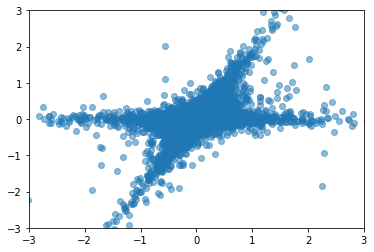

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

from sklearn.decomposition import PCA, FastICA

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

np.shape(X)
plt.scatter(X[:,0]/X.std(), X[:,1]/X.std(), alpha = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


In [ ]:
def MLE_ICA(X, learning_rate):
'''The function should return the unmixing matrix U from the mixed signals stored in X'''    
    
    
    
    return U






#### Question 2.2. Comparing ICA to PCA

Once you are done with the ICA reconstruction. Extract the principal direction form the same dataset and represent the points in the space generated form those directions. Compare the result with ICA. 